In [1]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp
from sklearn import svm 
from scipy import optimize as op
import scipy.io as lm
from sklearn.svm import SVC

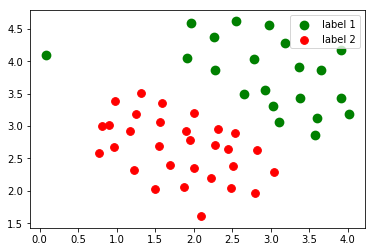

In [2]:
data = lm.loadmat('ex6data1.mat')
y = data['y'][:,0]
x = data['X']
neg = y == 0
pos = y == 1
ax = plt.gca()
ax.scatter(x[pos][:,0], x[pos][:,1], c='g', s=60, linewidth=2, label='label 1')
ax.scatter(x[neg][:,0], x[neg][:,1], c='r', s=60, label='label 2')
ax.legend(frameon= True, fancybox = True)

# Support Vector Machines

In [3]:
mod = svm.SVC(kernel='linear',C = 1.0)
mod.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

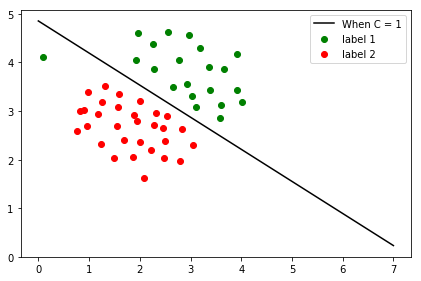

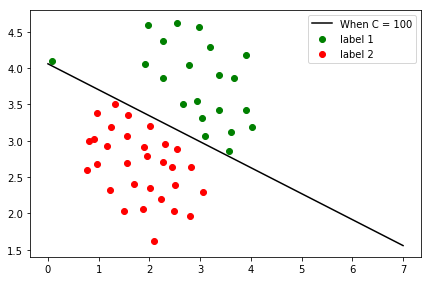

In [4]:
c = [1.0,100.0]
for i in range(0,len(c)):
    plt.figure(figsize=(7, 10))
    plt.subplot(len(c),1,i+1)
    mod = svm.SVC(kernel='linear',C = c[i])
    mod.fit(x,y)

    w = mod.coef_[0]
    a = -w[0] / w[1]

    xx = np.linspace(0,7)
    yy = a * xx - mod.intercept_[0] / w[1]

    h0 = plt.plot(xx, yy, 'k-', label="When C = %i"%c[i])

    plt.scatter(x[pos][:, 0], x[pos][:, 1], c = 'g',label='label 1')
    plt.scatter(x[neg][:, 0], x[neg][:, 1], c = 'r',label='label 2')
    plt.legend(frameon= True, fancybox = True)

# SVM with Gaussian Kernels


In [5]:
# Gaussian Kernel 
def gauss_Kern(x1,x2,sig):
    return np.exp(sum((x1-x2)**2)/(-2.0*(sig**2)))


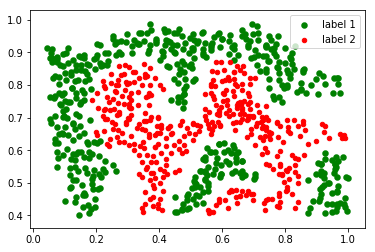

In [6]:
data = lm.loadmat('ex6data2.mat')
y = data['y'][:,0]
x = data['X']
neg = y == 0
pos = y == 1
ax = plt.gca()
ax.scatter(x[pos][:,0], x[pos][:,1], c='g', s=20, linewidth=2, label='label 1')
ax.scatter(x[neg][:,0], x[neg][:,1], c='r', s=20, label='label 2')
ax.legend(frameon= True, fancybox = True)

In [7]:
mod = SVC(kernel = 'rbf',gamma = 50,C = 30.0)
mod.fit(x,y)

SVC(C=30.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
def decision_bound(x):
    neg = y == 0
    pos = y == 1
    ax = plt.gca()
    ax.scatter(x[pos][:,0], x[pos][:,1], c='g', s=20, linewidth=2, label='Pass')
    ax.scatter(x[neg][:,0], x[neg][:,1], c='r', s=20, label='Fail')
    ax.legend(frameon= True, fancybox = True)
    M1 = max(x[:,0])
    m1 = min(x[:,0])
    x1 = np.linspace(m1, M1, 100)
    x2 = np.linspace(m1, M1, 100)
    X1, X2 = np.meshgrid(x1,x2)
    x_lin = zip(X1.ravel(),X2.ravel())
    F = mod.predict(x_lin)
    F = F.reshape(X1.shape)
    ax.contour(X1, X2, F,[0.5], linewidths=1, colors='b')

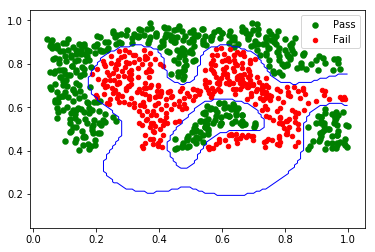

In [9]:
decision_bound(x)

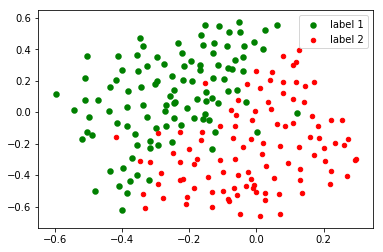

In [10]:
data = lm.loadmat('ex6data3.mat')
y = data['y'][:,0]
x = data['X']
neg = y == 0
pos = y == 1
ax = plt.gca()
ax.scatter(x[pos][:,0], x[pos][:,1], c='g', s=20, linewidth=2, label='label 1')
ax.scatter(x[neg][:,0], x[neg][:,1], c='r', s=20, label='label 2')
ax.legend(frameon= True, fancybox = True)
x_cv = data['Xval']
y_cv = data['yval'][:,0]

In [11]:
list_v = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
acc = []
for i in range(0,len(list_v)):
    for j in range(0,len(list_v)):
        mod = SVC(kernel = 'rbf',gamma = list_v[i],C = list_v[j])
        mod.fit(x,y)
        h_cv = mod.predict(x_cv)
        acc.append(sum(h_cv==y_cv)/(len(h_cv)*1.0))     

In [12]:
i = (np.argmax(acc)+1)/8
j = (np.argmax(acc)+1)%(i*8)

In [13]:
mod = SVC(kernel = 'rbf',gamma = list_v[i-1],C = list_v[j-1])
mod.fit(x,y)
h_cv = mod.predict(x_cv)
sum(h_cv==y_cv)/(len(h_cv)*1.0)

0.965

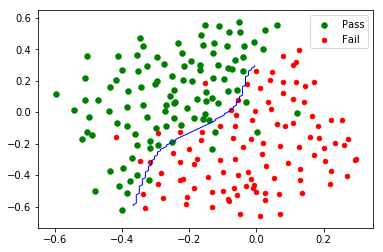

In [14]:
decision_bound(x)

# Spam Classification (Email Data Preprocessing Is Exculded)

In [15]:
data = lm.loadmat('spamTrain.mat')
y = data['y'][:,0]
x = data['X']
x_train = x[:3000]; y_train = y[:3000]
x_cv = x[3000:];y_cv = y[3000:]

In [16]:
gaussian_kernel = False
if gaussian_kernel:
    list_v = [0.01,0.03,0.1,0.3, 1, 3, 10, 30]
    acc = []
    for i in range(0,len(list_v)):
        for j in range(0,len(list_v)):
            mod = SVC(kernel = 'rbf',gamma = list_v[i],C = list_v[j])
            mod.fit(x_train,y_train)
            h_cv = mod.predict(x_cv)
            acc.append(sum(h_cv==y_cv)/(len(h_cv)*1.0)) 
        print i

In [17]:
data_test = lm.loadmat('spamTest.mat')
y_test = data_test['ytest'][:,0]
x_test = data_test['Xtest']

mod = SVC(kernel = 'linear',C = 0.1)
mod.fit(x,y)
h_test = mod.predict(x_test)
print "The model accuracy for the test data is " ,sum(h_test==y_test)/(len(h_test)*1.0)


The model accuracy for the test data is  0.989


# Top 15 Predictors for Spam

In [18]:
# Linear SVM : Weights 
w = mod.coef_[0]
w_index = np.argsort(w)[::-1]
vocab = pd.read_csv('vocab.csv', header = None,delimiter="\t" )
vocab  = vocab[1]
vocab[list(w_index)][:15]

1190         our
297        click
1397       remov
738     guarante
1795       visit
155     basenumb
476       dollar
1851        will
1298       price
1263       pleas
1066        most
1088        nbsp
965           lo
698           ga
791         hour
Name: 1, dtype: object